# Харитонов Олександр КА-12
## Лабораторна робота №2
### Варіант 10

Побудувати моделi класифiкацiї на основi методу дерев рiшень, використовуючи sklearn.tree.DecisionTreeClassifier з рiзними значеннями гiперпараметрiв:

• max_depth – максимальна глибина дерева,

• min_samples_split – мiнiмальна кiлькiсть прикладiв, якi мають бути у вузлi, перш нiж його можна буде розщепити,

• min_samples_leaf – мiнiмальна кiлькiсть прикладiв у листовому
вузлi,

• max_leaf_nodes – максимальна кiлькiсть листових вузлiв,

• max_features – максимальна кiлькiсть ознак, якi оцiнюються при
розщепленнi кожного вузла.

Початковi данi:
(а) sklearn.datasets.make_moons
(б) sklearn.datasets.load_digits

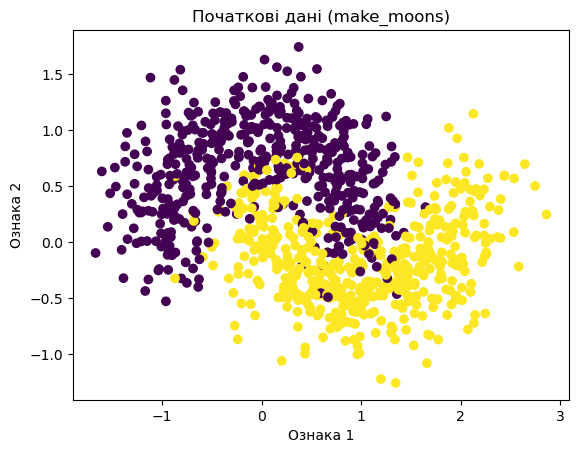

     Ознака 1  Ознака 2
0   -0.171863  0.596249
1    1.253283 -0.265414
2    0.723224  0.231943
3   -0.065198 -0.655194
4   -0.799493  0.552935
..        ...       ...
995  0.861014  0.343843
996 -0.229425  0.754849
997  1.770957 -0.509436
998 -1.061772  0.006786
999  0.761172  0.651960

[1000 rows x 2 columns]


In [1]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, auc, recall_score
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize
from itertools import cycle
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

# 1. Представлення початкових даних графічно
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Початкові дані (make_moons)')
plt.show()
df = pd.DataFrame(data=X, columns=['Ознака 1', 'Ознака 2'])
print(df)

### Розбиття даних на навчальний та валідаційний набори, побудова моделі класифікації, представлення моделі графічно

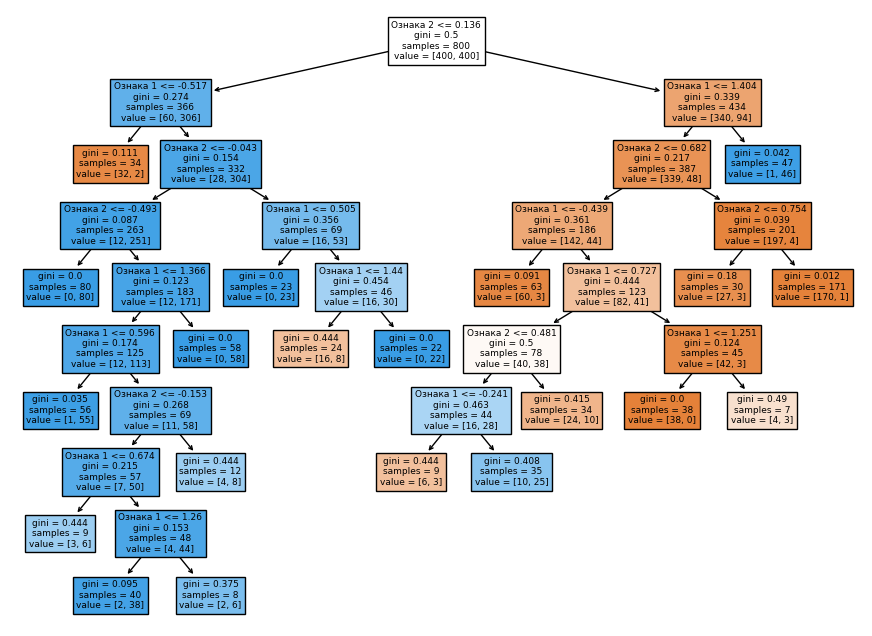

In [445]:
# 2. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 
model = DecisionTreeClassifier(max_depth = 10, max_features = 2, max_leaf_nodes = 20, min_samples_leaf = 5, min_samples_split = 40)
model.fit(X_train, y_train)

# 4.
plt.figure(figsize=(11, 8))
plot_tree(model, filled=True, feature_names=['Ознака 1', 'Ознака 2'])
plt.show()



### Виконання прогнозів та оцінка перенавчання

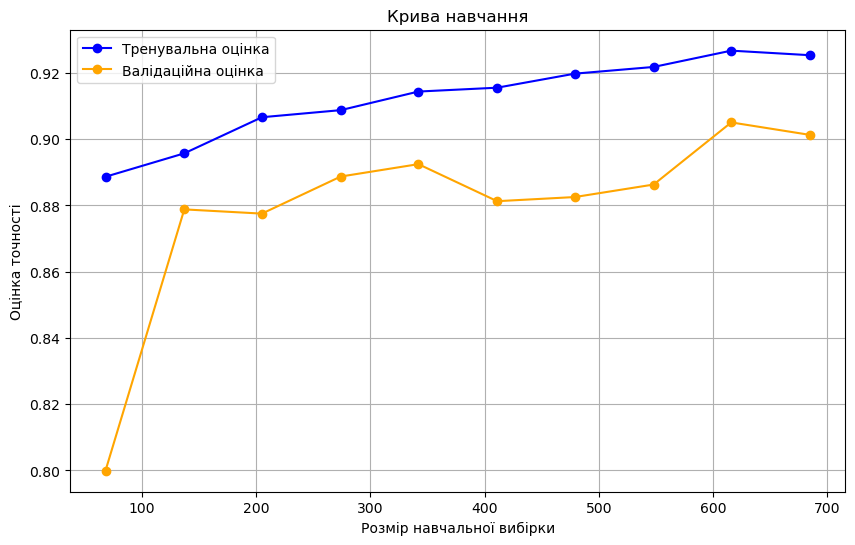

In [446]:
# 5.
y_pred = model.predict(X_test)
y_pred_t = model.predict(X_train)

# 6.
# Можна провести аналіз перенавчання на основі кривої навчання

# Побудувати криву навчання
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=7)

# Визначити середні значення та стандартне відхилення для тренувального та тестового наборів
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Побудувати графік кривої навчання
plt.figure(figsize=(10, 6))
plt.title('Крива навчання')
plt.xlabel('Розмір навчальної вибірки')
plt.ylabel('Оцінка точності')
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Тренувальна оцінка')
plt.plot(train_sizes, test_scores_mean, 'o-', color='orange', label='Валідаційна оцінка')
plt.legend(loc='best')
plt.grid()
plt.show()



### Розрахунок додаткових результатів

In [447]:
# 7.
y_prob = model.predict_proba(X_test)[:, 1]
y_prob_t = model.predict_proba(X_train)[:, 1]
print(y_prob)

[1.         0.42857143 1.         0.00584795 1.         1.
 0.33333333 0.33333333 1.         0.71428571 0.         1.
 0.         1.         0.00584795 0.9787234  0.98214286 0.00584795
 0.95       0.00584795 0.         0.05882353 0.95       0.00584795
 0.29411765 0.33333333 0.1        0.05882353 0.00584795 0.9787234
 1.         0.29411765 0.71428571 1.         0.00584795 0.98214286
 0.71428571 0.95       1.         1.         0.95       0.95
 0.98214286 0.04761905 0.29411765 1.         0.1        0.00584795
 1.         1.         0.1        0.00584795 0.04761905 0.1
 0.71428571 0.00584795 0.71428571 0.95       0.66666667 0.00584795
 1.         0.71428571 0.00584795 0.95       0.98214286 0.98214286
 1.         0.05882353 0.71428571 0.05882353 0.9787234  0.00584795
 0.1        0.66666667 0.29411765 0.9787234  1.         0.33333333
 0.00584795 0.         0.29411765 1.         0.00584795 1.
 0.98214286 0.71428571 0.05882353 0.00584795 0.00584795 0.05882353
 0.98214286 1.         0.9787234 

### Побудова границь рішень графічно

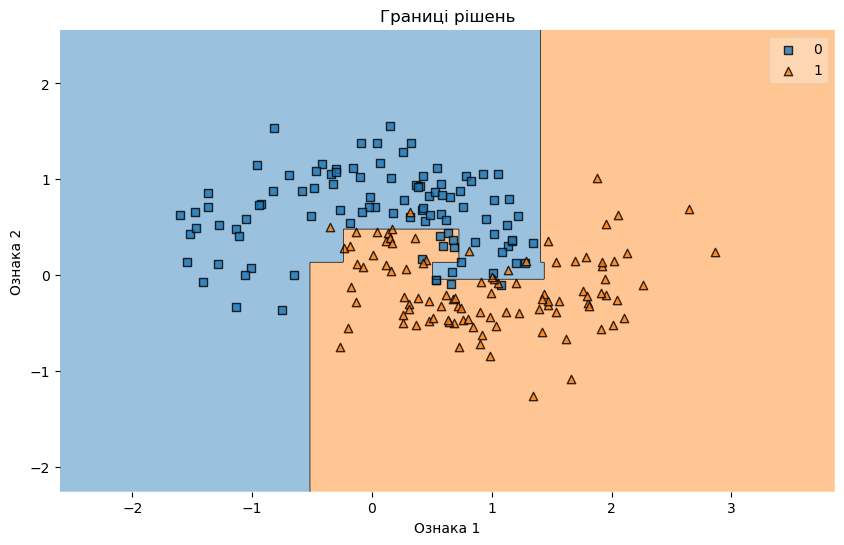

In [448]:
# 8.
# Для візуалізації границь рішень можна створити мішень контурних графіків
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test, y_test, clf=model)
plt.xlabel('Ознака 1')
plt.ylabel('Ознака 2')
plt.title('Границі рішень')
plt.show()


### Розрахунок критеріїв якості на тестовій множині

Accuracy: 0.91
Confusion matrix:
[[90 10]
 [ 8 92]]
F1: 0.9108910891089109
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       100
           1       0.90      0.92      0.91       100

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200



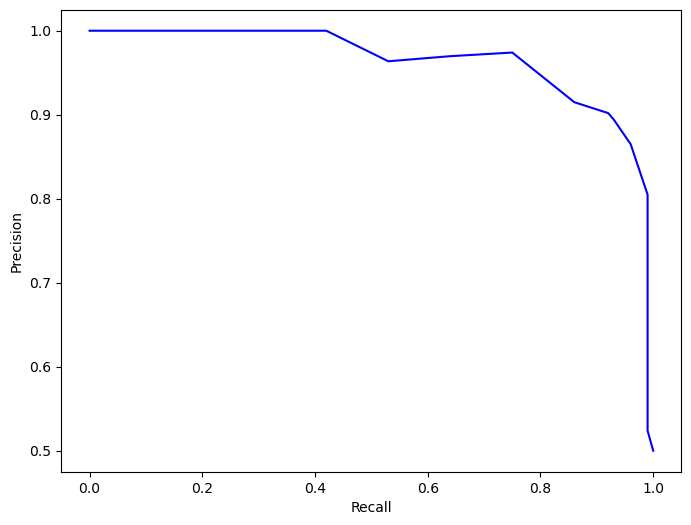

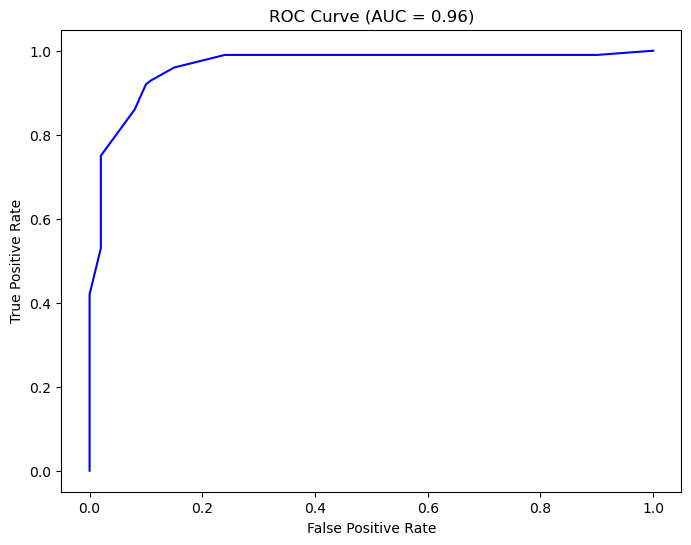

In [449]:
# 9.1
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confusion matrix:')
print(conf_matrix)
print(f'F1: {f1}')

report = classification_report(y_test, y_pred)
print(report)



precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')



fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc:.2f})')
plt.show()

### Розрахунок критеріїв якості на навчальній множині

0.93
[[377  23]
 [ 33 367]]
0.929113924050633
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       400
           1       0.94      0.92      0.93       400

    accuracy                           0.93       800
   macro avg       0.93      0.93      0.93       800
weighted avg       0.93      0.93      0.93       800



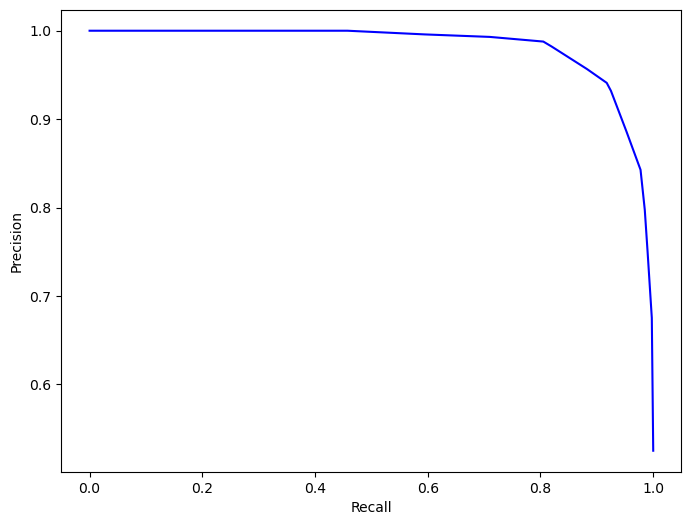

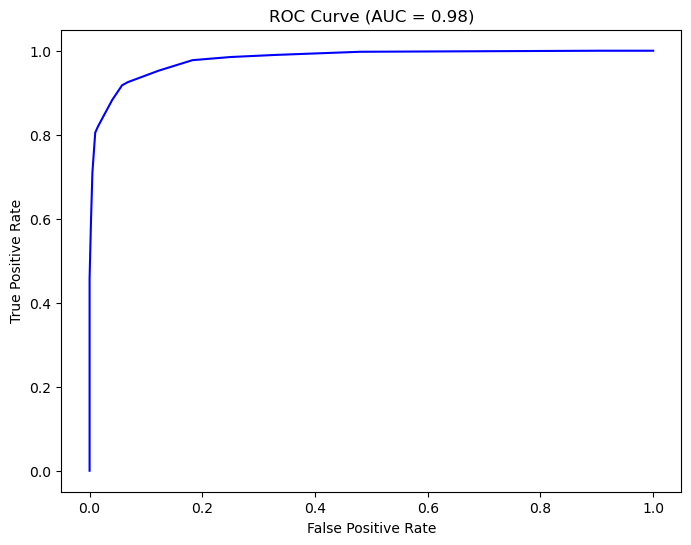

In [450]:
# 9.2
accuracy_t = accuracy_score(y_train, y_pred_t)
conf_matrix_t = confusion_matrix(y_train, y_pred_t)
f1_t = f1_score(y_train, y_pred_t)
print(accuracy_t)
print(conf_matrix_t)
print(f1_t)

report_t = classification_report(y_train, y_pred_t)
print(report_t)


precision_t, recall_t, _ = precision_recall_curve(y_train, y_prob_t)
plt.figure(figsize=(8, 6))
plt.plot(recall_t, precision_t, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


fpr_t, tpr_t, _ = roc_curve(y_train, y_prob_t)
roc_auc_t = roc_auc_score(y_train, y_prob_t)
plt.figure(figsize=(8, 6))
plt.plot(fpr_t, tpr_t, color='b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC = {roc_auc_t:.2f})')
plt.show()

## GridSearch

In [451]:
# 10.

param_range = [1, 3, 5, 10, 20, 40]
param_grid = {
    'max_depth': param_range,
    'min_samples_split': param_range[1:],
    'min_samples_leaf': param_range,
    'max_leaf_nodes': param_range[1:],
    'max_features': [1, 2], 
}

# Створили Grid Search об'єкт
grid_search = GridSearchCV(model, param_grid, cv=10, refit=True, scoring='accuracy')

# Запустили Grid Search на навчальних даних
grid_search.fit(X_train, y_train)
# Отримали найкращі гіперпараметри
print(grid_search.best_score_)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
print('Test accuracy: %.3f' % best_model.score(X_test, y_test))


0.9087500000000001
{'max_depth': 10, 'max_features': 2, 'max_leaf_nodes': 20, 'min_samples_leaf': 5, 'min_samples_split': 40}
Test accuracy: 0.910


Отримуємо міру найкращої моделі та пергелядаємо її параметри.
Далі, ми використовуємо тестовий набір даних для оцінки ефективності обраної найкращої моделі за допомогою оцінщика.

### Оцінка якості моделі на основі метрик та графічних представлень

Accuracy : Точність моделі становить 0.91 або 91%, що означає, що 91% всіх передбачень моделі є вірними. Це добрий показник точності.

Confusion Matrix: Матриця помилок дозволяє детальніше розглянути результати класифікації. У цій матриці є чотири значення:

90 істинно-позитивних (True Positives, TP) випадків: Модель правильно передбачила клас 1 (позитивний клас).

92 істинно-негативних (True Negatives, TN) випадку: Модель правильно передбачила клас 0 (негативний клас).

10 помилково-негативних (False Negatives, FN) випадків: Модель неправильно передбачила клас 0, хоча об'єкт насправді належить до класу 1.

8 помилково-позитивних (False Positives, FP) випадків: Модель неправильно передбачила клас 1, хоча об'єкт насправді належить до класу 0.

F1-score: F1-міра - це гармонійне середнє між точністю (precision) та повнотою (recall). Значення F1 міри становить 0.911, що є високим показником. Це говорить про те, що модель добре справляється з балансом між точністю та повнотою.

Precision : Для класу 0 точність становить 0.92, а класу 1 - 0.90. Це означає, що більшість об'єктів, які модель зарахувала до класу 0 або 1, дійсно належать до цих класів.

Recall: Для класу 0 повнота становить 0.90, а класу 1 - 0.92. Це означає, що модель добре виявляє об'єкти обох класів.

Тестова точність становить 0.910, що узгоджується з точністю, розрахованою на основі confusion matrix та F1.

Всі показники, включаючи accuracy, F1, precision та recall, для обох класів та середні значення хороші. Модель добре справляється із завданням класифікації та має гарний баланс між здатністю передбачати позитивні та негативні класи.



### Вплив розміру навчальної множини


In [452]:
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth = 10, max_features = 2, max_leaf_nodes = 20, min_samples_leaf = 5, min_samples_split = 40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        14
           1       0.67      1.00      0.80         6

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



In [453]:
X, y = make_moons(n_samples=250, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth = 10, max_features = 2, max_leaf_nodes = 20, min_samples_leaf = 5, min_samples_split = 40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        23
           1       0.89      0.89      0.89        27

    accuracy                           0.88        50
   macro avg       0.88      0.88      0.88        50
weighted avg       0.88      0.88      0.88        50



In [454]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(max_depth = 10, max_features = 2, max_leaf_nodes = 20, min_samples_leaf = 5, min_samples_split = 40)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.98      0.90        43
           1       0.98      0.86      0.92        57

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100



#### Бачимо чітку закономірність покращення якості моделі із збільшенням об'єму вибірки

# load_digits

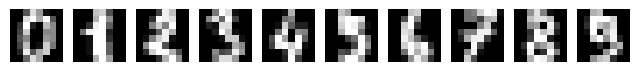

In [2]:
from sklearn.datasets import load_digits

# 1. Завантаження даних і їх візуалізація
digits = load_digits()
X = digits.data
y = digits.target

# Візуалізуємо декілька зразків зображень
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()


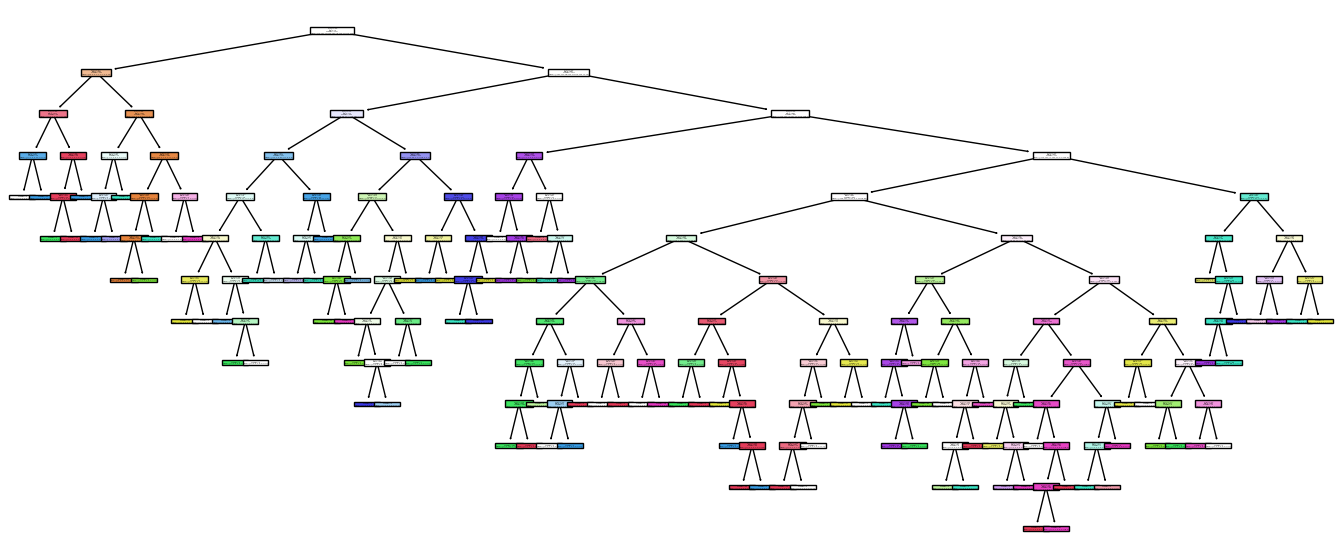

In [3]:
# 2. Розділіть дані на навчальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Навчання моделі рішень
decision_tree = DecisionTreeClassifier(max_depth=100, max_features=55, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5)
decision_tree.fit(X_train, y_train)

# 4. Візуалізація дерева рішень
plt.figure(figsize=(17,7))
plot_tree(decision_tree, filled=True)
plt.show()

In [4]:
y_pred = decision_tree.predict(X_test)
y_pred_t = decision_tree.predict(X_train)

### Розрахунок критеріїв якості на тестовій множині

In [458]:
accuracy_score(y_test, y_pred)

0.8583333333333333

In [459]:
f1_score(y_test, y_pred, average = "micro")

0.8583333333333333

In [460]:
confusion_matrix(y_test, y_pred)

array([[29,  0,  1,  0,  1,  1,  0,  0,  0,  1],
       [ 0, 21,  1,  0,  2,  0,  1,  1,  1,  1],
       [ 0,  0, 27,  3,  2,  0,  0,  0,  1,  0],
       [ 0,  1,  0, 31,  0,  0,  0,  0,  1,  1],
       [ 0,  1,  0,  0, 42,  1,  1,  1,  0,  0],
       [ 0,  0,  0,  0,  2, 42,  2,  0,  1,  0],
       [ 0,  1,  0,  0,  1,  1, 32,  0,  0,  0],
       [ 0,  0,  0,  2,  2,  0,  0, 30,  0,  0],
       [ 0,  2,  0,  1,  0,  2,  0,  0, 21,  4],
       [ 0,  0,  0,  3,  1,  0,  0,  2,  0, 34]], dtype=int64)

In [461]:
precision_score(y_test, y_pred, average=None)

array([1.        , 0.80769231, 0.93103448, 0.775     , 0.79245283,
       0.89361702, 0.88888889, 0.88235294, 0.84      , 0.82926829])

In [462]:
recall_score(y_test, y_pred, average=None)

array([0.87878788, 0.75      , 0.81818182, 0.91176471, 0.91304348,
       0.89361702, 0.91428571, 0.88235294, 0.7       , 0.85      ])

In [463]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.81      0.75      0.78        28
           2       0.93      0.82      0.87        33
           3       0.78      0.91      0.84        34
           4       0.79      0.91      0.85        46
           5       0.89      0.89      0.89        47
           6       0.89      0.91      0.90        35
           7       0.88      0.88      0.88        34
           8       0.84      0.70      0.76        30
           9       0.83      0.85      0.84        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.86       360
weighted avg       0.86      0.86      0.86       360



### Розрахунок критеріїв якості на навчальній множині

In [464]:
accuracy_score(y_train, y_pred_t)

0.9679888656924147

In [465]:
f1_score(y_train, y_pred_t, average = "micro")

0.9679888656924147

In [466]:
confusion_matrix(y_train, y_pred_t)

array([[142,   0,   0,   0,   0,   0,   1,   0,   2,   0],
       [  0, 149,   1,   2,   0,   0,   1,   0,   0,   1],
       [  0,   0, 140,   2,   0,   0,   1,   0,   1,   0],
       [  0,   1,   1, 143,   1,   2,   0,   0,   1,   0],
       [  0,   1,   1,   1, 131,   0,   0,   0,   1,   0],
       [  0,   0,   0,   0,   1, 131,   1,   0,   2,   0],
       [  0,   1,   0,   0,   1,   2, 141,   0,   1,   0],
       [  0,   0,   0,   1,   3,   1,   0, 139,   0,   1],
       [  0,   1,   1,   0,   2,   0,   0,   0, 140,   0],
       [  0,   0,   1,   2,   0,   1,   0,   0,   1, 135]], dtype=int64)

In [467]:
precision_score(y_train, y_pred_t, average=None)

array([1.        , 0.97385621, 0.96551724, 0.94701987, 0.94244604,
       0.95620438, 0.97241379, 1.        , 0.93959732, 0.98540146])

In [468]:
recall_score(y_train, y_pred_t, average=None)

array([0.97931034, 0.96753247, 0.97222222, 0.95973154, 0.97037037,
       0.97037037, 0.96575342, 0.95862069, 0.97222222, 0.96428571])

### Розрахунок критеріїв якості на тестовій множині(продовження)

In [469]:
def pr_curve(estimator, X, y):
    Y = label_binarize(y, classes = np.unique(y))
    n_classes = Y.shape[1]
    y_score = estimator.predict_proba(X)

    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(Y[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(Y[:, i], y_score[:, i])

    precision["micro"], recall["micro"], _ = precision_recall_curve(Y.ravel(), y_score.ravel())
    average_precision["micro"] = average_precision_score(Y, y_score, average="micro")

    color = cycle(["darkgreen", "darkorange", "cornflowerblue", "red"])

    _, ax = plt.subplots(figsize=(7, 8))

    display = PrecisionRecallDisplay(
        recall=recall["micro"],
        precision=precision["micro"],
        average_precision=average_precision["micro"],
    )
    display.plot(ax=ax, name="Micro-average precision-recall", color='deeppink', linestyle=':', lw = 4)

    for i, color in zip(range(n_classes), color):
        display = PrecisionRecallDisplay(
            recall=recall[i],
            precision=precision[i],
            average_precision=average_precision[i]
        )
        display.plot(ax=ax, name=f"Precision-recall for class {i+1}", color=color)


    handles, labels = display.ax_.get_legend_handles_labels()

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.legend(handles=handles, labels=labels, loc="best")
    ax.set_title("Precision-Recall curve to multi-class")

    plt.show()

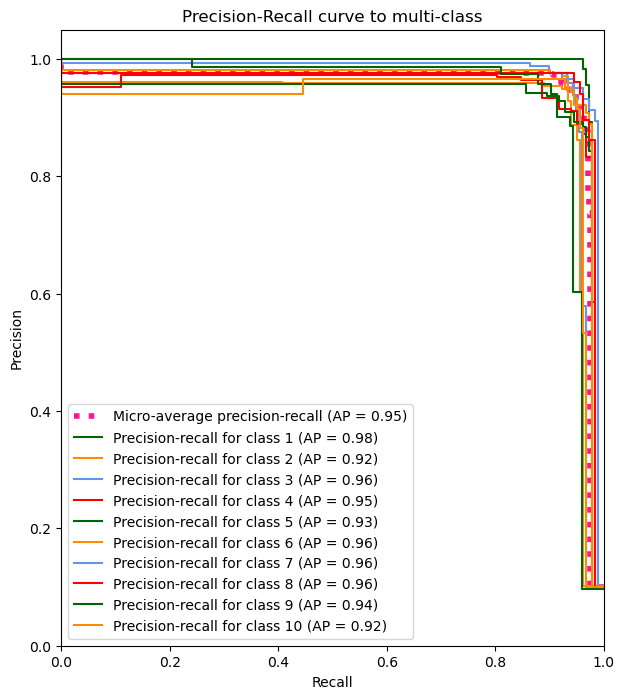

In [470]:
pr_curve(decision_tree, X, y)

In [471]:
def rc_curve(model, X, y):    
    Y = label_binarize(y, classes = np.unique(y)) 
    n_classes = Y.shape[1] 
    y_score = model.predict_proba(X) 
    

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])



    _, ax = plt.subplots(figsize=(7, 8))
    
    color = cycle(["navy", "green", "darkorange", "cornflowerblue", "red"])
        
    fpr["micro"], tpr["micro"], _ = roc_curve(Y.ravel(), y_score.ravel()) 
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    RocCurveDisplay(
            fpr=fpr["micro"],
            tpr=tpr["micro"],
            roc_auc=roc_auc["micro"]
        ).plot(ax=ax, name=f"micro average ROC-CURVE", color='deeppink', linestyle=':', linewidth=4) 
    
    
    for i, color in zip(range(n_classes), color):
        display = RocCurveDisplay(
            fpr=fpr[i],
            tpr=tpr[i],
            roc_auc=roc_auc[i]
        )
        display.plot(ax=ax, name=f"ROC-CURVE for class {i+1}", color=color)        
        
        

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

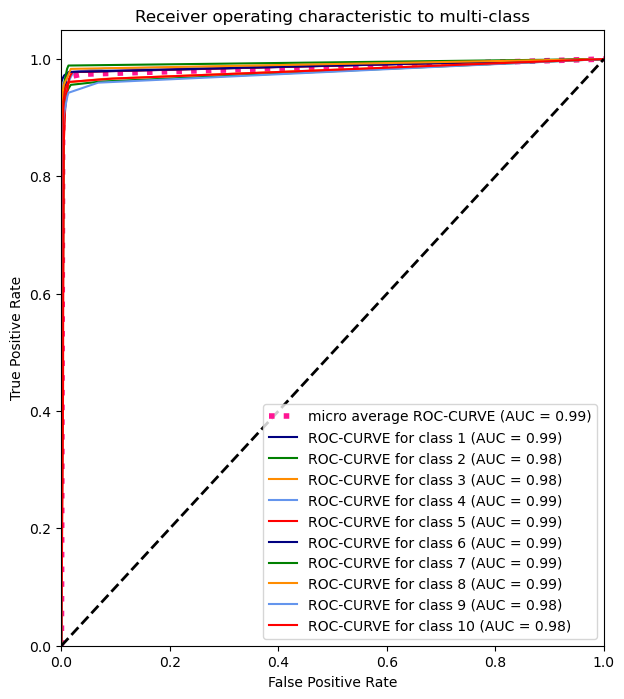

In [472]:
rc_curve(decision_tree, X, y)

## GridSearch

In [473]:
param_range = [1, 5, 10, 20, 50, 100]
param_grid = {
    'max_depth': param_range,
    'min_samples_split': param_range[1:],
    'min_samples_leaf': param_range,
    'max_leaf_nodes': param_range[1:],
    'max_features': list(range(50, 60, 5)), 
}

# Створили Grid Search об'єкт
grid_search = GridSearchCV(model, param_grid, cv=10, refit=True, scoring='accuracy')

# Запустили Grid Search на навчальних даних
grid_search.fit(X_train, y_train)
# Отримали найкращі гіперпараметри
print(grid_search.best_score_)
print(grid_search.best_params_)
best_model = grid_search.best_estimator_
print('Test accuracy: %.3f' % best_model.score(X_test, y_test))


0.8511169386169385
{'max_depth': 100, 'max_features': 55, 'max_leaf_nodes': 100, 'min_samples_leaf': 1, 'min_samples_split': 5}
Test accuracy: 0.867


## Висновки

На основі наданих даних можна зробити такі висновки про модель:

Accuracy: Модель має Accuracy 0.91, що означає, що приблизно 91% передбачень вірні. Це добрий показник точності.

Confusion Matrix: Матриця помилок не надана, але можна прочитати з метрик precision та recall наступне:

Для класу 0: точність (precision) становить 0.84, а повнота (recall) – 0.98. Це означає, що модель класифікує більшість об'єктів класу 0, але може пропустити деякі позитивні випадки (висока точність і висока повнота).

Для класу 1: точність становить 0,98, а повнота - 0,86. Це означає, що модель правильно класифікує більшість об'єктів класу 1, але може допустити деякі помилкові позитивні випадки (висока точність і трохи нижче повноти).

F1-score: Значення F1 становить 0.91, що є хорошим показником. Це свідчить про гарний баланс між точністю та повнотою моделі.

Precision і Recall: Показники точності та повноти для обох класів (0 та 1) різняться, але загалом хороші.

Загалом, всі метрики, включаючи accuracy, F1-міру, precision та recall, демонструють гарну якість моделі. Модель успішно класифікує об'єкти обох класів, але з різною точністю та повнотою.

Тестова точність становить 0.864, що трохи нижче, ніж значення accuracy, розраховане на основі метрик precision і recall. Це може бути викликане відмінностями у тому, як точність розраховується, і важливістю різних метриків.

В цілому, на основі наданих даних можна зробити висновок про те, що модель демонструє хорошу якість і може бути використана для класифікації з високою точністю та повнотою на цій задачі. 

In [474]:

selected_digits = [1, 7, 3]

# Вибираємо індекси зразків, які відповідають цим цифрам
selected_indices = [i for i in range(len(y)) if y[i] in selected_digits]

# Створення окремих датасетів
X_selected = X[selected_indices]
y_selected = y[selected_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=100, max_features=55, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.91      0.97      0.94        32
           3       0.91      0.89      0.90        36
           7       0.93      0.90      0.91        41

    accuracy                           0.92       109
   macro avg       0.92      0.92      0.92       109
weighted avg       0.92      0.92      0.92       109



In [475]:

selected_digits = [1, 8, 3, 4, 5, 9]

# Вибираємо індекси зразків, які відповідають цим цифрам
selected_indices = [i for i in range(len(y)) if y[i] in selected_digits]

# Створення окремих датасетів
X_selected = X[selected_indices]
y_selected = y[selected_indices]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)
decision_tree = DecisionTreeClassifier(max_depth=100, max_features=55, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=5)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        30
           3       0.90      0.90      0.90        30
           4       0.90      0.93      0.92        41
           5       0.82      0.97      0.89        33
           8       0.97      0.86      0.91        42
           9       0.88      0.90      0.89        41

    accuracy                           0.91       217
   macro avg       0.91      0.91      0.91       217
weighted avg       0.91      0.91      0.91       217



Бачимо чітку закономірність покращення якості моделі із зменшенням об'єму вибірки